***Emma Arenas Villaverde***
***

# Netflix Movies and TV Shows Analysis
The `netflix-titles` dataset provides a comprehensive overview of the diverse selection of movies and TV shows available on Netflix. This dataset is rich with details on various aspects of media offerings, allowing for in-depth analysis of viewer trends, content popularity, and streaming habits. As a valuable asset for media analysts, content strategists, and digital entertainment researchers, it enables the exploration of content dynamics, audience preferences, and the broader changes shaping the streaming industry.

## Data Preparation and Cleaning

### Importing Libraries

To initiate our data preparation and cleaning process, we will first install a set of **R libraries** that are essential for our tasks:

In [ ]:
install.packages("readr") # to install the package
install.packages("dplyr") # # to install the package
install.packages("lubridate") # # to install the package
install.packages("ggplot2") # # to install the package

- `readr`: this library is optimized for reading CSV files. It allows us to load our dataset quickly and efficiently into the R environment.
- `dplyr`: a cornerstone of data manipulation within the R ecosystem, dplyr makes data transformation and exploration straightforward and intuitive.
- `lubridate`: provides a set of functions that simplify the process of managing and manipulating date-time objects.
- `ggplot2`: when it comes to creating complex and aesthetically pleasing graphics, ggplot2 is the go-to library.

In [ ]:
library(readr) # to load the package
library(dplyr) # to load the package
library(lubridate) # to load the package
library(ggplot2) # to load the package

###  Loading Dataset

Next, we are going to load our dataset to start working with it:

In [3]:
netflix_titles <- read.csv2("../data/netflix-titles.csv")

### Data Overview

Once loaded, let's examine its **structure** in detail:

In [4]:
dim(netflix_titles) # to obtain its dimensions

[1] 8811   12

In [5]:
str(netflix_titles) # to see its internal structure

'data.frame':	8811 obs. of  12 variables:
 $ show_id     : chr  "s1" "s2" "s3" "s4" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ director    : chr  "Kirsten Johnson" "" "Julien Leclercq" "" ...
 $ cast        : chr  "" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "" ...
 $ country     : chr  "United States" "South Africa" "" "" ...
 $ date_added  : chr  "September 25, 2021" "September 24, 2021" "September 24, 2021" "September 24, 2021" ...
 $ release_year: chr  "2020" "2021" "2021" "2021" ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ listed_in   : chr  "Documentarie

The `netflix_titles` dataset is structured as a data frame comprising **8811 observations** across **12 distinct variables**. These variables include a mix of **character strings**:  
 such as `show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, and `description`. Each of these columns provides detailed information about the content available on Netflix:

In [6]:
head(netflix_titles) # to view its first six rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
2,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
4,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
5,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


### Removing Unwanted Columns

In the process of refining our dataset for a more focused analysis, we are going to remove the `show_id`, `description`, and `date_added` columns:

In [7]:
netflix_titles$show_id <- NULL # to delete a row
netflix_titles$description <- NULL # to delete a row
netflix_titles$date_added <- NULL # to delete a row

 - The `show_id` is a unique identifier that, while useful for database management, does not contribute to our exploratory data analysis.  
 - The `description` contains textual data that requires natural language processing to analyze, which falls outside the scope of this current study.  
 - Lastly, the `date_added` field is not essential for our intended trend analysis.

In [8]:
names(netflix_titles) # to get the names of its actual rows

[1] "type"         "title"        "director"     "cast"         "country"     
[6] "release_year" "rating"       "duration"     "listed_in"

#### Rearrancing Columns

Let's rearrange our dataset columns for better organization:

In [9]:
netflix_titles <- netflix_titles[,c("title","type","release_year", "country", "director","cast", "duration", "rating","listed_in")] # to rearrange its columns

In [10]:
names(netflix_titles) # to get the names of its actual rows

[1] "title"        "type"         "release_year" "country"      "director"    
[6] "cast"         "duration"     "rating"       "listed_in"

### Detection of Duplicate Record

We will now proceed to the detection of **duplicate records** within our dataset. Identifying and removing duplicates is a crucial step in the data cleaning process as it ensures the integrity of our analysis. By eliminating these redundancies, we can guarantee that each data point represents a unique instance, which is vital for accurate trend analysis, predictive modeling, and any other data-driven decision-making processes:

In [11]:
sum(duplicated(netflix_titles)) # to see how many duplicate records exist

[1] 3

In [12]:
netflix_titles <- netflix_titles %>% distinct() # to remove duplicates

In [13]:
sum(duplicated(netflix_titles)) # to see how many duplicate records now exist

[1] 0

### Checking Missing Values

In this dataset, **missing values** are represented not as explicit "NA" values, but rather as empty strings. Before proceeding with our analysis, we need to convert these empty strings into proper "NA" values:

In [ ]:
netflix_titles <- netflix_titles %>% # to convert all empty strings to "NA"
  mutate(across(everything(), na_if, ""))

In [15]:
missing_values <- any(is.na(netflix_titles)) # to identify if there is any "NA" value
missing_values

[1] TRUE

In [16]:
netflix_titles %>% # to count missing values in each column
  summarise(across(everything(), ~sum(is.na(.))))

title,type,release_year,country,director,cast,duration,rating,listed_in
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,2,832,2635,826,5,6,3


#### Fixing Missing Values

To deal with the **missing values** in our dataset, we are going to replace each “NA” value in each column with the text “Unknown”. This decision ensures data integrity by providing a consistent placeholder for the missing information. By using “Unknown”, we maintain the structure of the data set while improving interpretability and transparency:

In [17]:
netflix_titles$title[is.na(netflix_titles$title)] <- "Unknown title" # to convert "NA" values to a text string
netflix_titles$type[is.na(netflix_titles$type)] <- "Unknown type" # to convert "NA" values to a text string
netflix_titles$release_year[is.na(netflix_titles$release_year)] <- "Unknown year" # to convert "NA" values to a text string
netflix_titles$country[is.na(netflix_titles$country)] <- "Unknown country" # to convert "NA" values to a text string
netflix_titles$director[is.na(netflix_titles$director)] <- "Unknown director" # to convert "NA" values to a text string
netflix_titles$cast[is.na(netflix_titles$cast)] <- "Unknown cast" # to convert "NA" values to a text string
netflix_titles$duration[is.na(netflix_titles$duration)] <- "Unknown duration" # to convert "NA" values to a text string
netflix_titles$rating[is.na(netflix_titles$rating)] <- "Unknown rating" # to convert "NA" values to a text string
netflix_titles$listed_in[is.na(netflix_titles$listed_in)] <- "Unknown list" # to convert "NA" values to a text string

In [18]:
netflix_titles %>% # to count missing values in each column
  summarise(across(everything(), ~sum(is.na(.))))

title,type,release_year,country,director,cast,duration,rating,listed_in
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


### Changing Data Type of Columns

We will now proceed to adjust the **data types** of our columns to their appropriate formats.  
Our first task is to convert the `release_year` column to numeric format. This adjustment is essential for ensuring consistency in data representation and enabling numerical operations and analyses on the release years:

In [20]:
netflix_titles$release_year <- as.numeric(netflix_titles$release_year) # to change the data type
str(netflix_titles$release_year) 

 num [1:8808] 2020 2021 2021 2021 2021 ...


In [21]:
str(netflix_titles)

'data.frame':	8808 obs. of  9 variables:
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ release_year: num  2020 2021 2021 2021 2021 ...
 $ country     : chr  "United States" "South Africa" "Unknown country" "Unknown country" ...
 $ director    : chr  "Kirsten Johnson" "Unknown director" "Julien Leclercq" "Unknown director" ...
 $ cast        : chr  "Unknown cast" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "Unknown cast" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ listed_in   : chr  "Documentaries" "International TV Shows, TV Dramas, TV Mysteries" "Crime TV Shows, Inte

### Creating New Column from "duration"

Now, we are going to create two new columns; `duration_min` and `seasons`, to provide a more granular view of the data. By breaking down the `duration` information into minutes for "Movies" and `seasons` for "TV shows", we can gain deeper insights into the content lengths and structures:

In [22]:
netflix_titles$duration_min <- NA # to create new rows
netflix_titles$seasons <- NA  # to create new rows

is_minutes <- grepl("min$", netflix_titles$duration)
netflix_titles$duration_min[is_minutes] <- as.numeric(gsub(" min", "", netflix_titles$duration[is_minutes]))

is_seasons <- grepl("Seasons?$", netflix_titles$duration)
netflix_titles$seasons[is_seasons] <- as.numeric(gsub(" Seasons?", "", netflix_titles$duration[is_seasons]))

In [23]:
netflix_titles$duration <- NULL # to delete the row
head(netflix_titles)

,title,type,release_year,country,director,cast,rating,listed_in,duration_min,seasons
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Dick Johnson Is Dead,Movie,2020,United States,Kirsten Johnson,Unknown cast,PG-13,Documentaries,90,NA
2,Blood & Water,TV Show,2021,South Africa,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",TV-MA,"International TV Shows, TV Dramas, TV Mysteries",NA,2
3,Ganglands,TV Show,2021,Unknown country,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",TV-MA,"Crime TV Shows, International TV Shows, TV Action & Adventure",NA,1
4,Jailbirds New Orleans,TV Show,2021,Unknown country,Unknown director,Unknown cast,TV-MA,"Docuseries, Reality TV",NA,1
5,Kota Factory,TV Show,2021,India,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",TV-MA,"International TV Shows, Romantic TV Shows, TV Comedies",NA,2
6,Midnight Mass,TV Show,2021,Unknown country,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",TV-MA,"TV Dramas, TV Horror, TV Mysteries",NA,1


### Preview of Data

Let's take a moment to review the **structure** of our dataset after completing the cleaning and preparation steps:

In [24]:
dim(netflix_titles)

[1] 8808   10

In [25]:
glimpse(netflix_titles)

Rows: 8,808
Columns: 10
$ title        <chr> "Dick Johnson Is Dead", "Blood & Water", "Ganglands", "Ja…
$ type         <chr> "Movie", "TV Show", "TV Show", "TV Show", "TV Show", "TV …
$ release_year <dbl> 2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 202…
$ country      <chr> "United States", "South Africa", "Unknown country", "Unkn…
$ director     <chr> "Kirsten Johnson", "Unknown director", "Julien Leclercq",…
$ cast         <chr> "Unknown cast", "Ama Qamata, Khosi Ngema, Gail Mabalane, …
$ rating       <chr> "PG-13", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "PG…
$ listed_in    <chr> "Documentaries", "International TV Shows, TV Dramas, TV M…
$ duration_min <dbl> 90, NA, NA, NA, NA, NA, 91, 125, NA, 104, NA, NA, 127, 91…
$ seasons      <dbl> NA, 2, 1, 1, 2, 1, NA, NA, 9, NA, 1, 1, NA, NA, 1, 4, NA,…


## Exploratoy Data Analysis (EDA)

###  Descriptive Statistics

As we transition to the exploratory analysis phase, our first step is to conduct a **statistical examination** of the dataset. We are going to extract key statistical measures, including **quartiles**, **median**, **mean**, **minimum**, and **maximum** values, for each numeric variable in our dataset. Through this statistical overview, we aim to gain initial insights into the overall structure and patterns present in the dataset, setting the stage for more in-depth analyses and visualizations:

In [26]:
summary(netflix_titles$release_year) # to quickly summarize its values
summary(netflix_titles$duration_min) # to quickly summarize its values
summary(netflix_titles$seasons) # to quickly summarize its values

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1925    2013    2017    2014    2019    2024       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   3.00   87.00   98.00   99.58  114.00  312.00    2682 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.000   1.000   1.765   2.000  17.000    6132 

#### Detection of Outliers

To further explore our dataset and identify potential **outliers**, we are going to employ **boxplots**; a powerful visualization tool for understanding the distribution of numerical variables and detecting outliers.  

- The central box represents the **interquartile range (IQR)**, spanning from the first **quartile (Q1)** to the third quartile **(Q3)**, which means the middle half of the data falls within this range. The lower edge of the box indicates Q1, while the upper edge marks Q3. The line inside the box represents the **median (Q2)**, the midpoint of the data.  
- The *whiskers* stretch from the box to the **minimum** and **maximum** values that are within 1.5 times the IQR from the edges of the box, defining the range of data considered to be within the norm, excluding outliers.  
- The individual points outside the *whiskers* represent **outliers**, which are release years considerably different from the rest of the data, falling outside of 1.5 times the IQR.

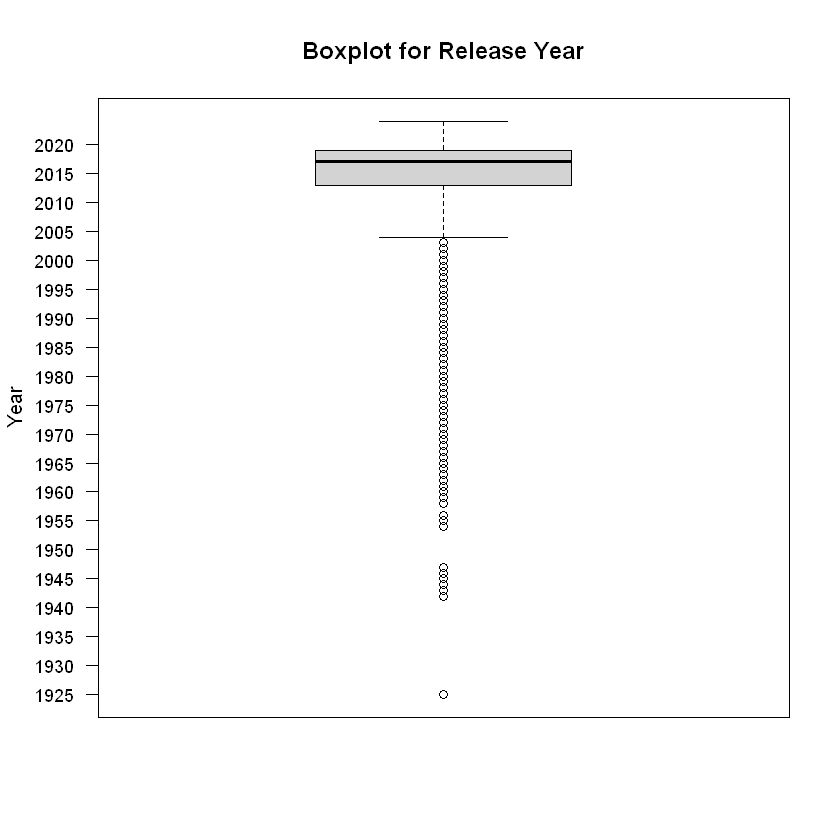

In [32]:
boxplot(netflix_titles$release_year, main="Boxplot for Release Year", ylab="Year", yaxt='n', las=2) # to create a boxplot
axis(2, at=seq(min(netflix_titles$release_year, na.rm=TRUE), max(netflix_titles$release_year, na.rm=TRUE), by=5), las=2, cex.axis=0.9) # to customize the boxplot

- The bulk of the data is found in a narrow range, as evidenced by the compact box, which implies a high volume of releases in more recent years.  
- The **median** appears to be just after the year 2015, suggesting that half of the movies and series were released after this date.  
- With the *lower whisker* descending much further than the upper, it's clear that there's a long tail of releases stretching back to earlier years. This extension reveals the presence of titles from a variety of older eras.
- **Outliers** are present below the main cluster of the data, as shown by individual points that fall well outside the common range. These represent titles that are notably older than the median, highlighting the inclusion of classic films or series that date back several decades.

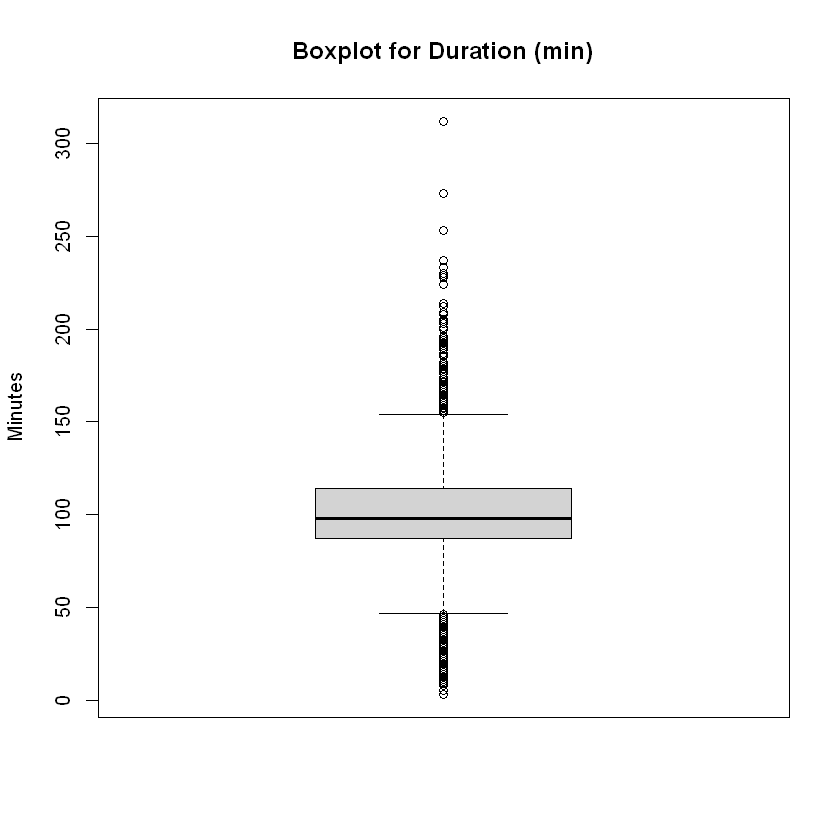

In [37]:
boxplot(netflix_titles$duration_min, main="Boxplot for Duration (min)", ylab="Minutes") # to create a boxplot

- The **median duration**, represented by the line within the box, is approximately at 100 minutes, which is typical for the length of a standard feature film.  
- The **interquartile range**, depicted by the box itself, is quite narrow, suggesting that a significant number of Netflix titles cluster around this median duration.  
- There is a substantial number of **outliers**, which reveals the presence of a diverse range of content lengths on Netflix, although the majority tend to be around the typical length of a movie.

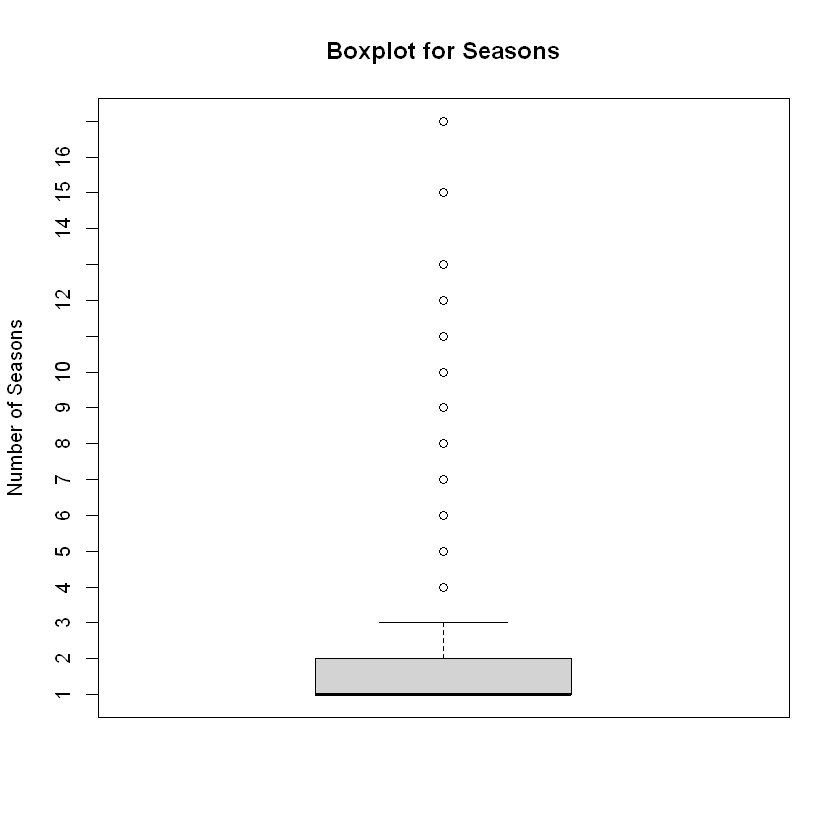

In [42]:
boxplot(netflix_titles$seasons, main="Boxplot for Seasons", ylab="Number of Seasons") # to create a boxplot
axis(2, at=seq(from=min(netflix_titles$seasons, na.rm=TRUE), to=max(netflix_titles$seasons, na.rm=TRUE), by=1)) # to customize the boxplot

- The data is concentrated at the lower end of the scale, with the box sitting close to the bottom, which implies that most series have a small number of seasons.
- We can observe that the **median** is near the bottom of the box, suggesting that the typical series has only a one season. This point likely reflects the challenging nature of maintaining a series over many seasons.
- Despite the concentration of data at the lower end, the *whiskers* and numerous **outliers** above the upper quartile show that there are series with a significantly higher number of seasons, although these are less common.

### Visual Data Exploration

Having delved into the statistical measures of our dataset, we now transition to the next phase of our exploratory analysis. This segment aims to illuminate patterns, trends, and relationships that are not immediately evident from the raw numbers.

#### Distribution of Movies vs. Series

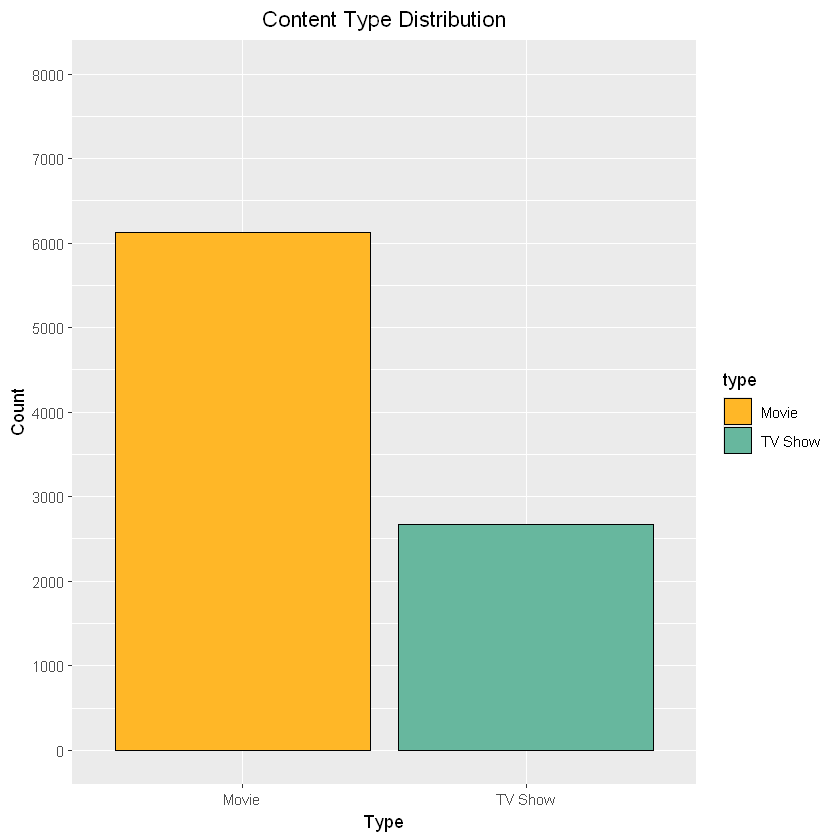

In [88]:
netflix_titles_filtered <- netflix_titles %>% 
  filter(type %in% c("Movie", "TV Show"))

ggplot(netflix_titles_filtered, aes(x = type, fill = type)) +
  geom_bar(stat = "count", color = "black") +
  labs(title = "Content Type Distribution", x = "Type", y = "Count") +
  scale_fill_manual(values = c("#ffb727", "#67b79e")) + 
  scale_y_continuous(
    breaks = seq(0, 8000, by = 1000),  
    limits = c(0, 8000) 
  ) +
  theme(plot.title = element_text(hjust = 0.5))

 It's clear from the chart that movies outnumber TV shows significantly. The count for movies rises above 6000, while the count for TV shows is closer to 2000. This visualization effectively illustrates the composition of content on the platform, indicating a heavier focus on movies within the available selections.

#### Launch Trends by Year


Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


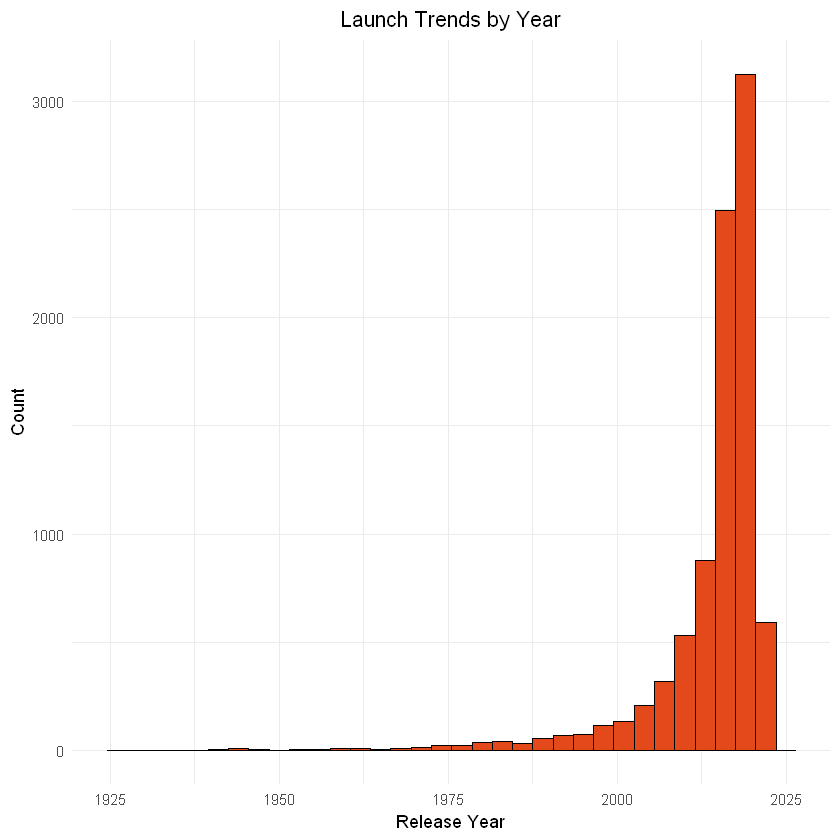

In [87]:
ggplot(netflix_titles, aes(x = as.numeric(release_year))) +
  geom_histogram(binwidth = 3, fill = '#e4491c', color = 'black') +
  labs(title = "Launch Trends by Year", x = "Release Year", y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

The bars increase in height as we move closer to the present, with a sharp increase in content starting from around the year 2000. The tallest bars are near the end of the timeline, which indicates a significant surge in the number of titles released in the most recent years. This suggests that the platform has been rapidly adding newer content, with the highest volume of releases occurring in the latest years represented on the chart.

#### Top 10 Country Distribution


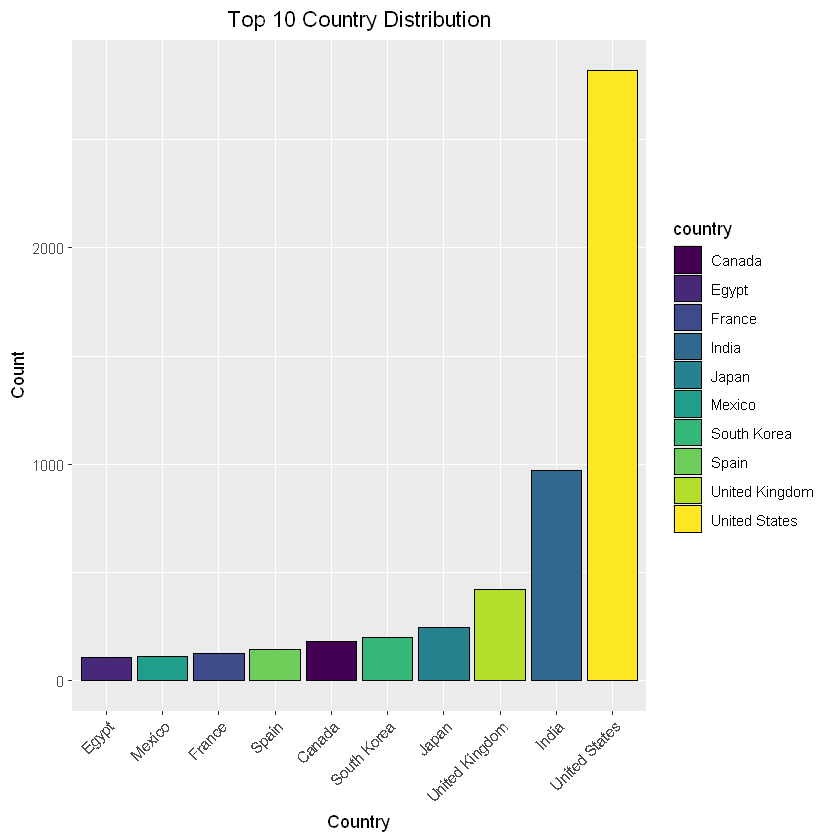

In [94]:
country_counts <- netflix_titles %>%
  filter(!country %in% c("Other", "Unknown country")) %>%
  count(country) %>%
  arrange(desc(n))

# Filtrar para obtener solo los top 10 países por conteo
top_countries <- head(country_counts, 10)

# Crear el gráfico de barras con los países ordenados
ggplot(top_countries, aes(x = reorder(country, n), y = n, fill = country)) +
  geom_bar(stat = "identity", color = "black") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Top 10 Country Distribution", x = "Country", y = "Count") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_fill_viridis_d()

The United States, represented by the yellow bar, has the highest count, towering over the rest, which indicates a significant majority of content comes from the U.S. India, in blue, follows as a distant second. Other countries, like UK, Japan, and South Korea, also contribute notable numbers, but much less compared to the U.S.

#### Duration of Content

Warning message:
"Removed 4 rows containing non-finite outside the scale range (`stat_bin()`)."


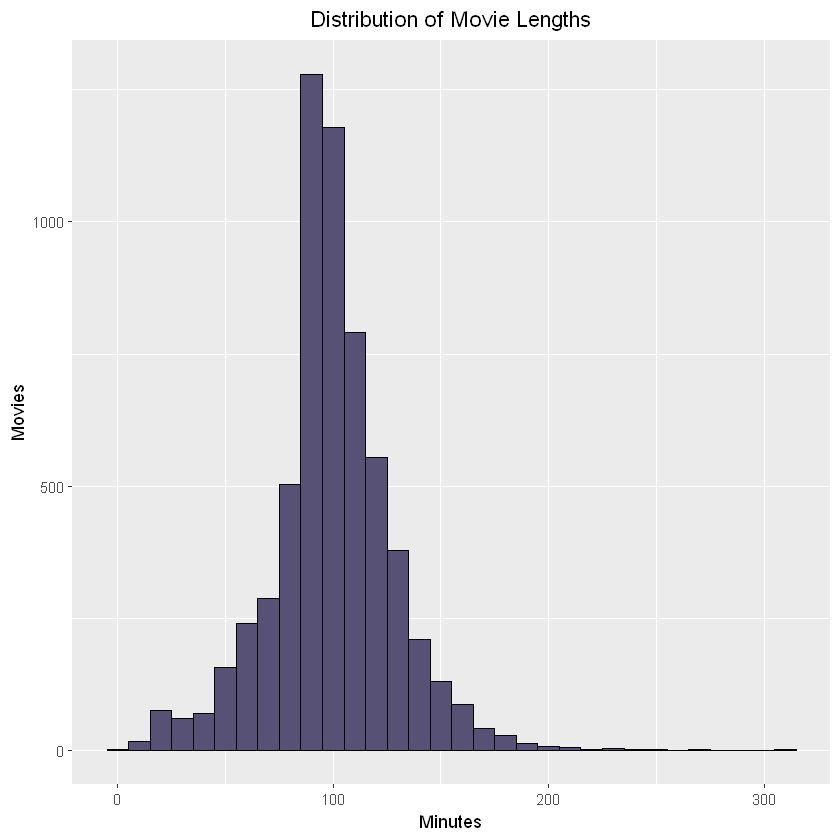

In [127]:
ggplot(subset(netflix_titles, type == "Movie"), aes(x = duration_min)) +
  geom_histogram(binwidth = 10, fill = "#565175", color = 'black') +
  labs(title = "Distribution of Movie Lengths", x = "Minutes", y = "Movies") +
  theme(plot.title = element_text(hjust = 0.5))


The data is shaped in a bell curve, with the highest concentration of movies around the 90 to 100-minute mark, which is typical for feature-length films. The distribution tails off as the movie lengths get shorter or longer, indicating that there are fewer very short or very long movies. The peak of the histogram suggests that the most common movie length on Netflix is around the standard duration for most cinematic releases. 

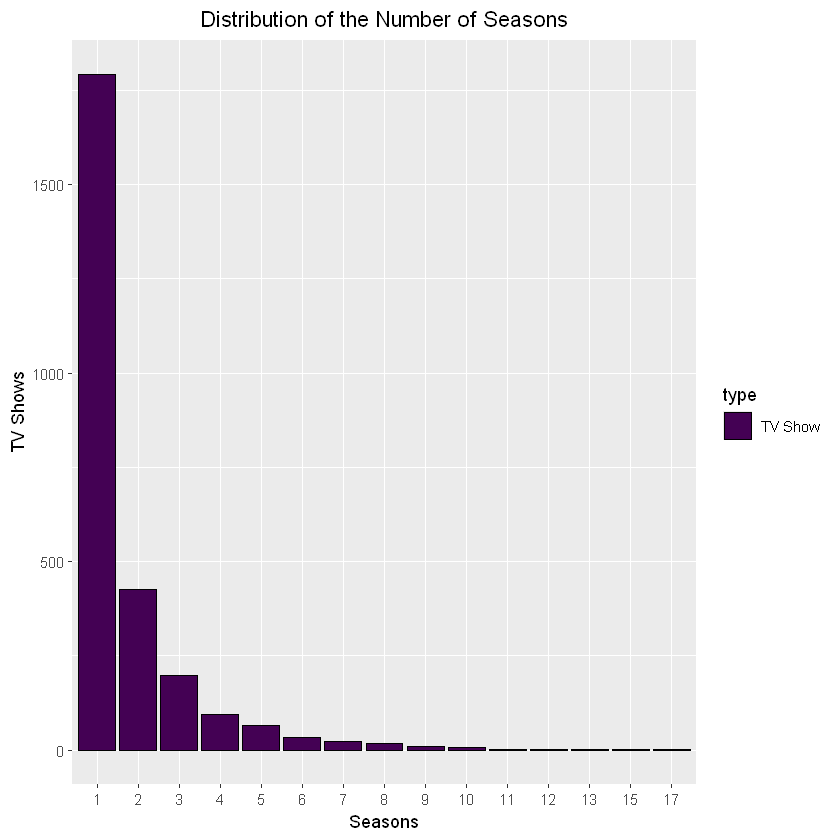

In [124]:
ggplot(subset(netflix_titles, type == "TV Show"), aes(x = as.factor(seasons), fill = type)) +
  geom_bar(color = 'black') +
  labs(title = "Distribution of the Number of Seasons", x = "Seasons", y = "TV Shows") +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_fill_viridis_d()


The purple bars show that a vast majority of TV shows have only one season, with the number dramatically decreasing as the number of seasons increases. There are significantly fewer shows with two seasons, and the numbers continue to drop for shows with three or more seasons. This visualization suggests that single-season TV shows are most common in the selection, possibly indicating a large number of limited series or shows that did not extend beyond their initial season.

#### Relationship of Rating to Content Type

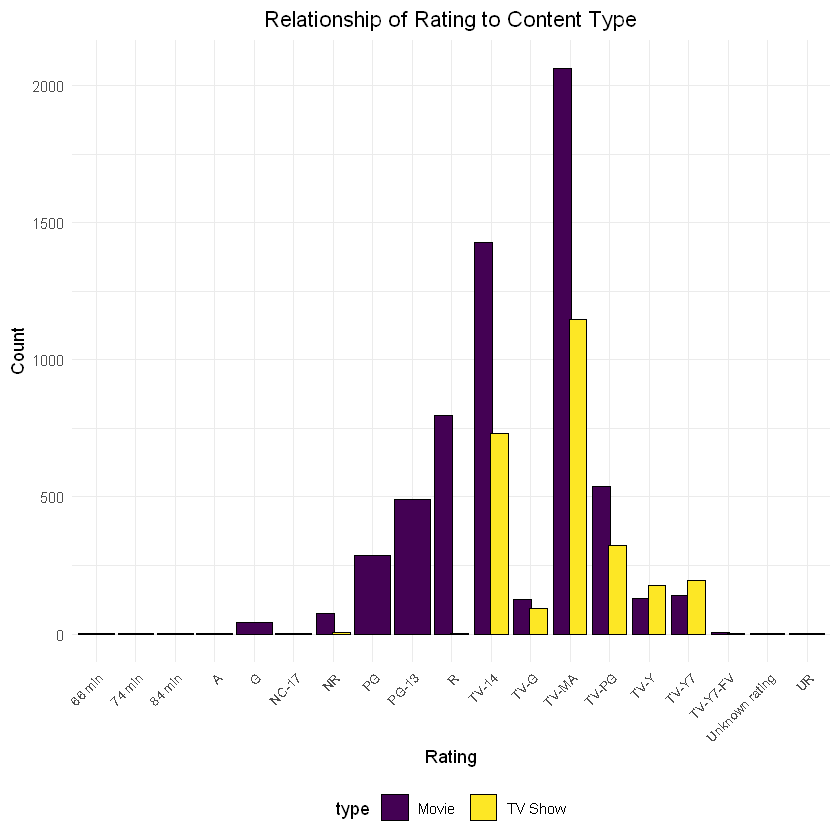

In [128]:
netflix_titles_filtered <- netflix_titles_filtered %>%
  filter(type %in% c("Movie", "TV Show"))
  
ggplot(netflix_titles_filtered, aes(x = rating, fill = type)) +
  geom_bar(position = position_dodge(width = 0.8), color = "black") + 
  labs(
    title = "Relationship of Rating to Content Type",
    x = "Rating",
    y = "Count"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 8), 
    plot.title = element_text(hjust = 0.5), 
    legend.position = "bottom"
  ) +
  scale_fill_viridis_d() 

The chart shows that TV-MA rated content has the highest count for both movies and TV shows, with the count for movies being substantially higher. TV-14 rated titles also have a high count, especially for movies. 